# Image Processing in Python
---

## Introducing Image Processing and scikit-image

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from skimage import data
rocket_image = data.rocket()

In [0]:
from skimage import color
grayscale = color.rgb2gray(rocket_image)
rgb = color.gray2rgb(grayscale)

In [0]:
def show_image(image, title='Image', cmap_type='gray'):
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

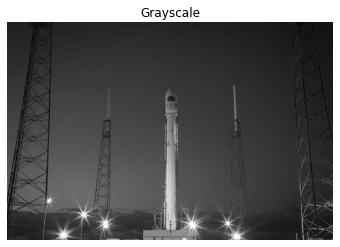

In [5]:
from skimage import color
grayscale = color.rgb2gray(rocket_image)
show_image(grayscale,"Grayscale")

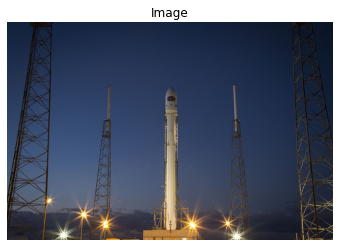

In [6]:
rgb = color.gray2rgb(rocket_image)
show_image(rgb)

In [0]:
coffee_image = data.coffee()
coins_image = data.coins()

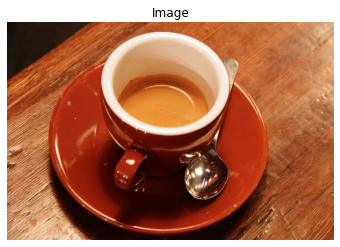

In [8]:
show_image(coffee_image)

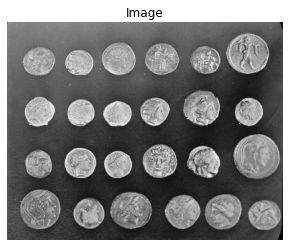

In [9]:
show_image(coins_image)

---
### RGB to grayscale
---

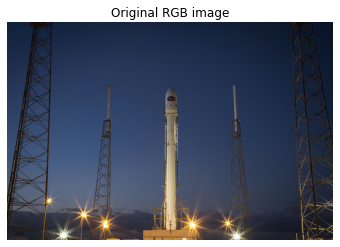

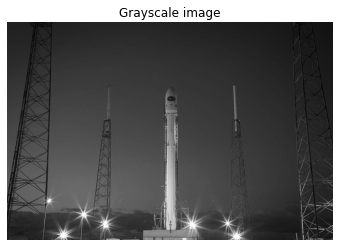

In [10]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

---
### Flipping out 
---

<class 'numpy.ndarray'>


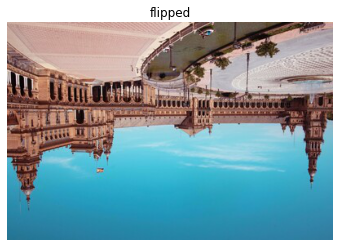

In [11]:
flipped_seville = plt.imread('sevilleup(2).jpg')
print(type(flipped_seville))
show_image(flipped_seville, 'flipped')

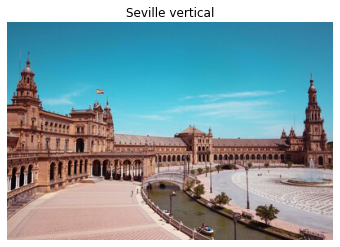

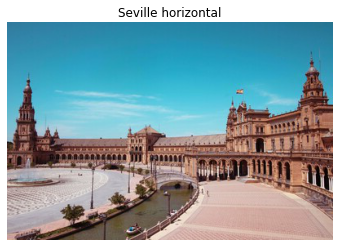

In [12]:
# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

# Flip the image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

# Show the resulting image
show_image(seville_vertical_flip, 'Seville vertical')

# Show the resulting image
show_image(seville_horizontal_flip, 'Seville horizontal')

---
### Histograms
---
Extracting information from images is a fundamental part of image enhancement. This way we can balance the red and blue to make the image look colder or warmer.

We will use `hist()` to display the 256 different intensities of the red color. And `ravel()` to make these color values an array of one flat dimension.


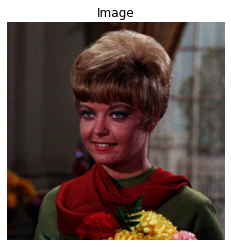

In [13]:
image = plt.imread('4.1.01.tiff')
show_image(image)

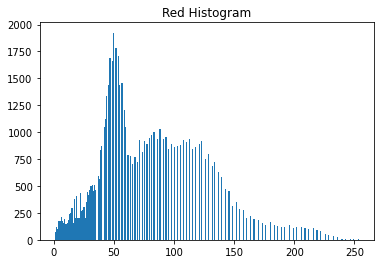

In [14]:
# Obtain the red channel
red_channel = image[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)

# Set title and show
plt.title('Red Histogram')
plt.show()

---
### Getting started with thresholding
---

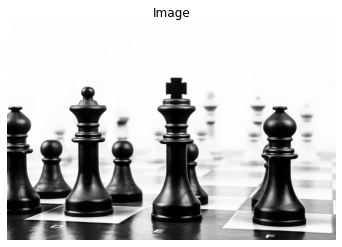

In [15]:
chess_pieces_image = plt.imread('bw.jpg')
show_image(chess_pieces_image)

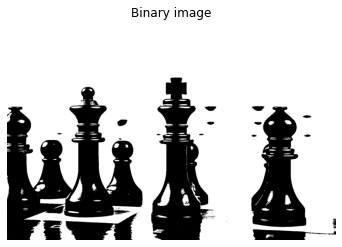

In [16]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

**When the background isn't that obvious**

Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then you can use a global threshold value as we practiced before, using `threshold_otsu()`. However, if there's uneven background illumination, adaptive thresholding `threshold_local()` (a.k.a. local thresholding) may produce better results.

In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.

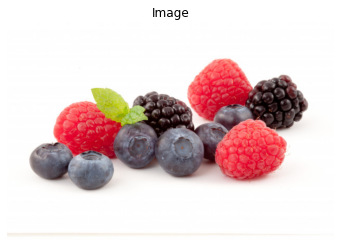

In [17]:
fruits_image = plt.imread('fruits-2.jpg')
show_image(fruits_image)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


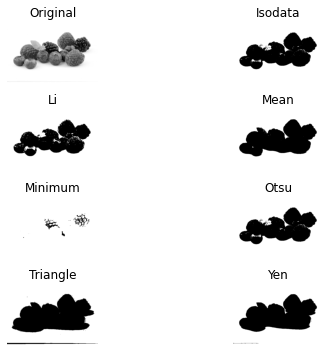

In [18]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the grayscale image
fig, ax = try_all_threshold(grayscale, verbose=True)

# Show the resulting plots
plt.show()

# As we see, this image works good with some global thresholding methods (like the "Yen" and "Mean") and not so well in others, 
#(like the "Minimum").

## Filters, Contrast, Transformation and Morphology

We will learn to detect object shapes using edge detection filters, improve medical images with contrast enhancement and even enlarge pictures to five times its original size! We will also apply morphology to make thresholding more accurate when segmenting images and go to the next level of processing images with Python.

---
### Edge detection
---

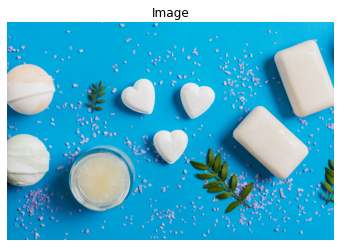

In [19]:
soaps_image = plt.imread('soap_image.jpg')
show_image(soaps_image)

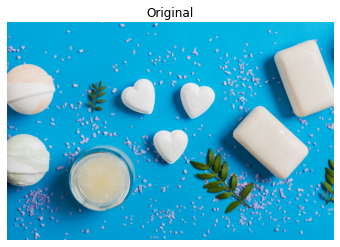

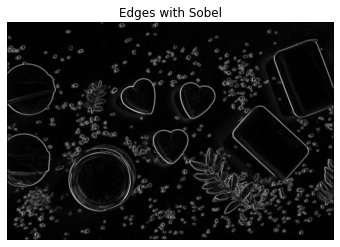

In [20]:
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

Now, we will reduce the sharpness of an image of a building taken during a London trip, through filtering.

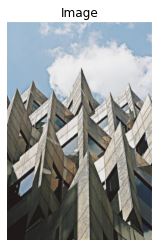

In [21]:
building_image = plt.imread('building_image.jpg')
show_image(building_image)

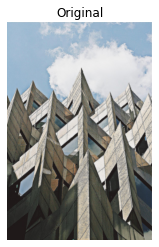

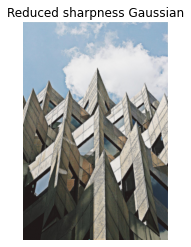

In [22]:
# Import Gaussian filter 
from skimage.filters import gaussian 

# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)

# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

---
### Contrast enhancement 
---

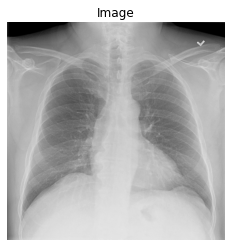

In [23]:
chest_xray_image = plt.imread('chest_xray_image.png')
show_image(chest_xray_image)

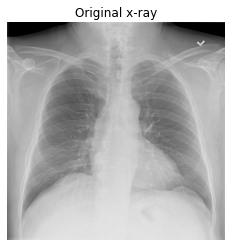

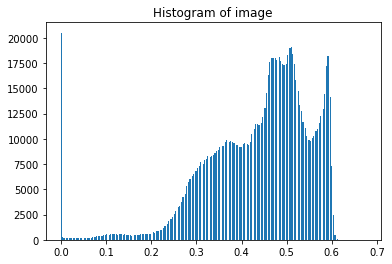

In [24]:
# Import the required module
from skimage import exposure

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

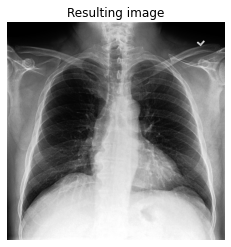

In [25]:
# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

Now, we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it.

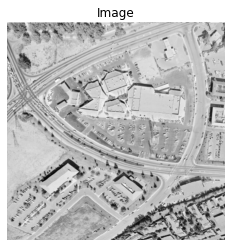

In [26]:
image_aerial = plt.imread('image_aerial.tiff')
show_image(image_aerial)

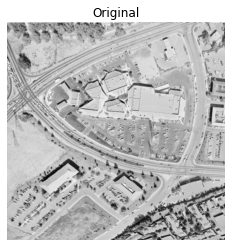

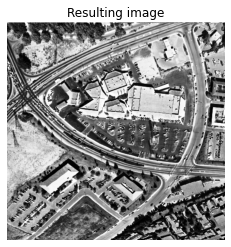

In [27]:
# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_hist(image_aerial)

# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')

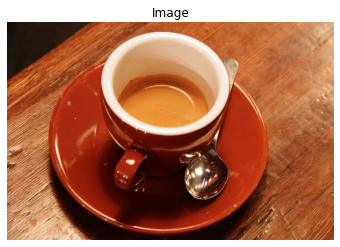

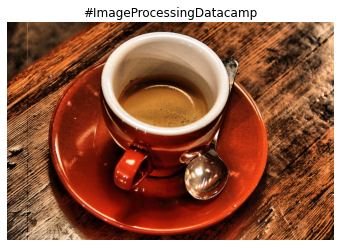

In [28]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image)
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

# We have increased the contrast of the image using an algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. 
# Local details can therefore be enhanced even in regions that are darker or lighter than the rest of the image.
# plt.imsave('coffee_en.png', adapthist_eq_image)

---
### Transformations
---

In [0]:
image_cat = plt.imread('image_cat.jpg')

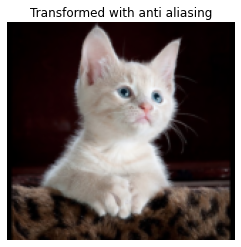

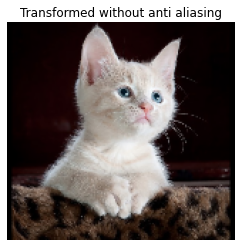

In [30]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")

# Seems like the anti aliasing filter prevents the poor pixelation effect to happen, making it look better but also less sharp.

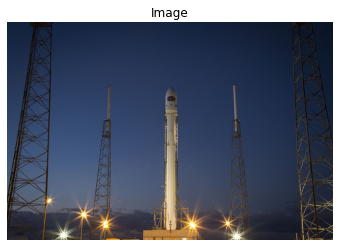

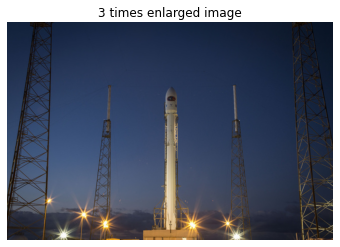

In [31]:
# Import the module and function to enlarge images
from skimage.transform import rescale

# Import the data module
from skimage import data

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, multichannel=True)

# Show original and resulting image
show_image(rocket_image)
show_image(enlarged_rocket_image, "3 times enlarged image")

In [0]:
dogs_banner = plt.imread('dogs_banner.jpg')

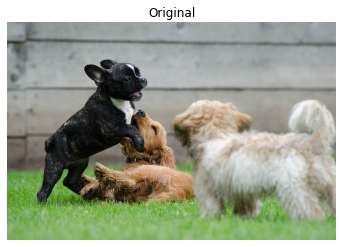

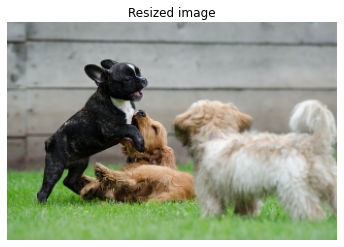

In [33]:
# Import the module and function
from skimage.transform import resize

# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width),
                       anti_aliasing=True)

# Show the original and rotated image
show_image(dogs_banner, 'Original')
show_image(image_resized, 'Resized image')

---
### Morphology
---

In [0]:
upper_r_image = plt.imread('r5.png')

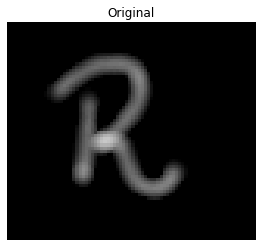

In [35]:
# Import the morphology module
from skimage import morphology

# Obtain the eroded shape 
eroded_image_shape = morphology.binary_erosion(upper_r_image) 

# See results
show_image(upper_r_image, 'Original')
# show_image(eroded_image_shape, 'Eroded image')

## Image restoration, Noise, Segmentation and Contours


---
### Removing logos


In [0]:
image_with_logo = plt.imread('https://assets.datacamp.com/production/repositories/4470/datasets/3fabad1e29879cba6fe5c0cb7d47d41cf9141437/4.2.06_w_logo_2_2.png')

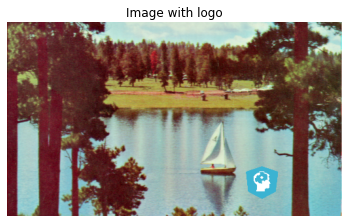

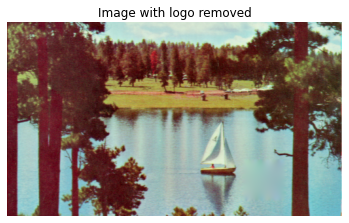

In [37]:
# Import the module from restoration
from skimage.restoration import inpaint

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:272, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                  mask,
                                  multichannel=True)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')

---
### Let's make some noise!
---

In [0]:
fruit_image = plt.imread('fruits_square.jpg')

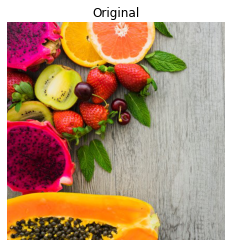

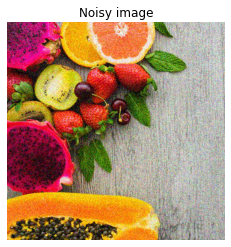

In [39]:
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

---
### Is someone there?
---

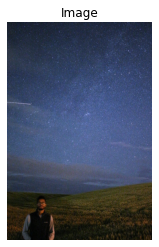

In [40]:
night_image = plt.imread('face_det3.jpg')
show_image(night_image)

In [0]:
import matplotlib
def show_detected_face(result, detected, title="Face image"):
  plt.imshow(result)
  img_desc = plt.gca()
  plt.set_cmap('gray')
  plt.title(title)
  plt.axis('off')
  for patch in detected:
    img_desc.add_patch(matplotlib.patches.Rectangle((patch['c'], patch['r']),patch['width'],patch['height'],fill=False,color='r',linewidth=2))
  plt.show()

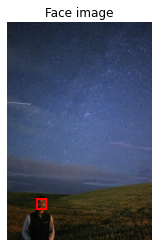

In [42]:
from skimage.feature import Cascade

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200))

# Show the detected faces
show_detected_face(night_image, detected)

---
### Multiple faces 
---

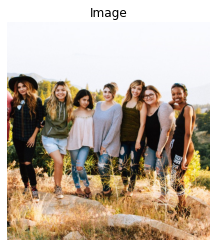

In [43]:
friends_image = plt.imread('face_det_friends22.jpg')
show_image(friends_image)

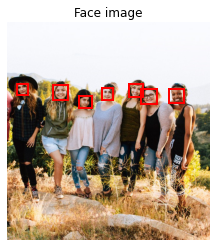

In [44]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

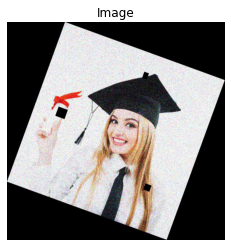

In [45]:
damaged_image = plt.imread('sally_damaged_image.jpg')
show_image(damaged_image)

In [0]:
# # Import the necessary modules
# from skimage.restoration import denoise_tv_chambolle, inpaint
# from skimage.transform import rotate

# # Transform the image so it's not rotated
# upright_img = rotate(damaged_image, 20)

# # Remove noise from the image, using the chambolle method
# upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1, multichannel=True)

# # Reconstruct the image missing parts
# mask = get_mask(upright_img)
# result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)

# show_image(result)